# Plotting Any Kind of Distribution with `matplotlib` and `scipy`

It's important to plot distributions of variables when doing exploratory analysis. However, there may be times when you want to see the theoretical distribution on a plot, i.e. when you want to see how much your variable deviates from it, or when you want to decide on a distribution function visually.

Let's take the normal (gaussian) distribution as an example. The probability density function (pdf) is:

$
f(x|\mu,\sigma^2)=\frac{1}{\sqrt{2\pi\sigma^2}}e^{-\frac{(x-\mu)^2}{2\sigma^2}}
$

Basically, if we have a range of $x$'s, a mean ($\mu$) and a standard deviation ($\sigma$), we can pass them onto this formula and get corresponding $y$ values, which we can then plot using the standard `matplotlib` `plot()` function:

Let's setup the scene first:

In [79]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

plt.style.use('seaborn') # pretty matplotlib plots
plt.rcParams['figure.figsize'] = (12, 8)

Let's get our x values, determine a mean and a standard deviation, and setup the formula for the normal pdf:

In [95]:
x = np.linspace(-5, 5, 5000)
mu = 0
sigma = 1

y = (1 / (np.sqrt(2 * np.pi * np.power(sigma, 2)))) * \
    (np.power(np.e, -(np.power((x - mu), 2) / (2 * np.power(sigma, 2)))))

Now we can plot these using:

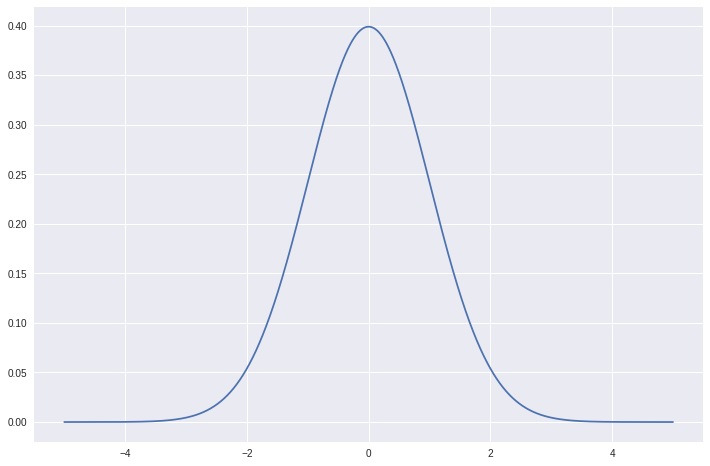

In [96]:
plt.plot(x, y);

Which is fine and dandy, but it gets quite cumbersome to write those formulas from scratch using `numpy` and `scipy` functions from scratch for every distribution we want. Some are even really hard to implement, take for example the cumulative distribution function (cdf) for the standard normal distribution:

$
\Phi(x)=\frac{1}{\sqrt{2\pi}}\int_{-\infty }^{x}e^{-t^{2}/2}\,{\rm {d}}t
$

Fortunately for us, the people at `scipy` provided nearly every kind of distribution function in the [`scipy.stats`](https://docs.scipy.org/doc/scipy/reference/stats.html#module-scipy.stats) package. Using that, we can achieve the same result as above in a cleaner, less error-prone code. We can even plot the cdf on top of that:

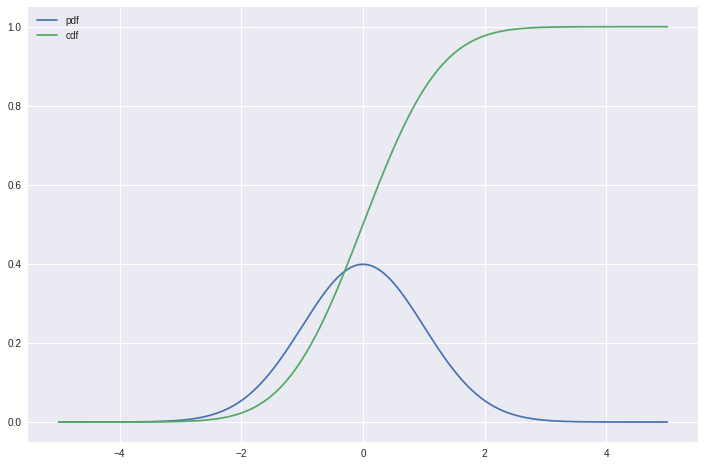

In [84]:
import scipy.stats as ss

x = np.linspace(-5, 5, 5000)
mu = 0
sigma = 1

y_pdf = ss.norm.pdf(x, mu, sigma) # the normal pdf
y_cdf = ss.norm.cdf(x, mu, sigma) # the normal cdf

plt.plot(x, y_pdf, label='pdf')
plt.plot(x, y_cdf, label='cdf')
plt.legend();

For reuse, it may be a good idea to put these into a function:

In [85]:
import scipy.stats as ss

def plot_normal(x_range, mu=0, sigma=1, cdf=False, **kwargs):
    '''
    Plots the normal distribution function for a given x range
    If mu and sigma are not provided, standard normal is plotted
    If cdf=True cumulative distribution is plotted
    Passes any keyword arguments to matplotlib plot function
    '''
    x = x_range
    if cdf:
        y = ss.norm.cdf(x, mu, sigma)
    else:
        y = ss.norm.pdf(x, mu, sigma)
    plt.plot(x, y, **kwargs)

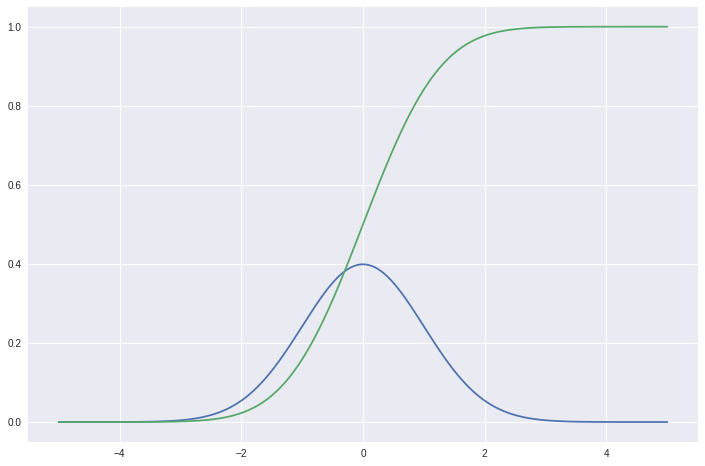

In [86]:
x = np.linspace(-5, 5, 5000)

plot_normal(x)
plot_normal(x, cdf=True)

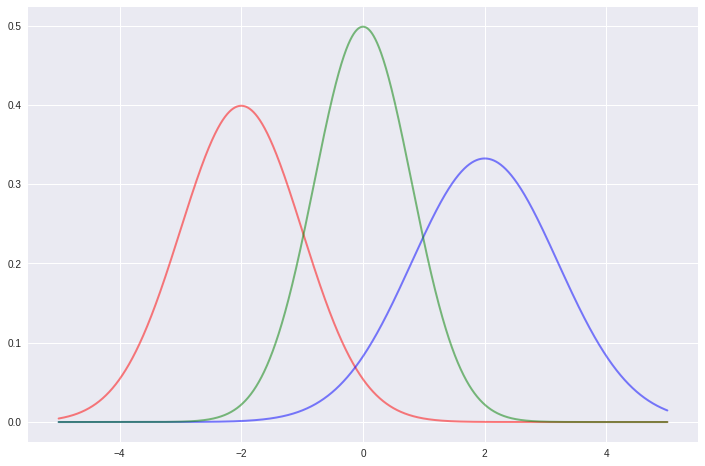

In [87]:
plot_normal(x, -2, 1, color='red', lw=2, ls='-', alpha=0.5)
plot_normal(x, 2, 1.2, color='blue', lw=2, ls='-', alpha=0.5)
plot_normal(x, 0, 0.8, color='green', lw=2, ls='-', alpha=0.5);

Given this knowledge, we can now define a function for plotting any kind of distribution. The important bit is to be careful about the parameters of the corresponding `scipy.stats` function (Some distributions require more than a mean and a standard deviation). You can check those parameters on the [official docs](https://docs.scipy.org/doc/scipy/reference/stats.html#module-scipy.stats) for `scipy.stats`.

**The exponential distribution:**

In [88]:
import scipy.stats as ss

def plot_exponential(x_range, mu=0, sigma=1, cdf=False, **kwargs):
    '''
    Plots the exponential distribution function for a given x range
    If mu and sigma are not provided, standard exponential is plotted
    If cdf=True cumulative distribution is plotted
    Passes any keyword arguments to matplotlib plot function
    '''
    x = x_range
    if cdf:
        y = ss.expon.cdf(x, mu, sigma)
    else:
        y = ss.expon.pdf(x, mu, sigma)
    plt.plot(x, y, **kwargs)

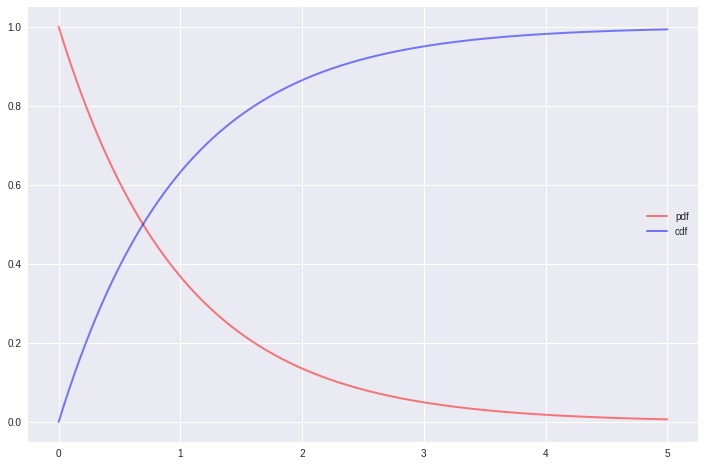

In [89]:
x = np.linspace(0, 5, 5000)

plot_exponential(x, 0, 1, color='red', lw=2, ls='-', alpha=0.5, label='pdf')
plot_exponential(x, 0, 1, cdf=True, color='blue', lw=2, ls='-', alpha=0.5, label='cdf')
plt.legend();

**The F distribution:**

In [90]:
import scipy.stats as ss

def plot_f(x_range, dfn, dfd, mu=0, sigma=1, cdf=False, **kwargs):
    '''
    Plots the f distribution function for a given x range, dfn and dfd
    If mu and sigma are not provided, standard f is plotted
    If cdf=True cumulative distribution is plotted
    Passes any keyword arguments to matplotlib plot function
    '''
    x = x_range
    if cdf:
        y = ss.f.cdf(x, dfn, dfd, mu, sigma)
    else:
        y = ss.f.pdf(x, dfn, dfd, mu, sigma)
    plt.plot(x, y, **kwargs)

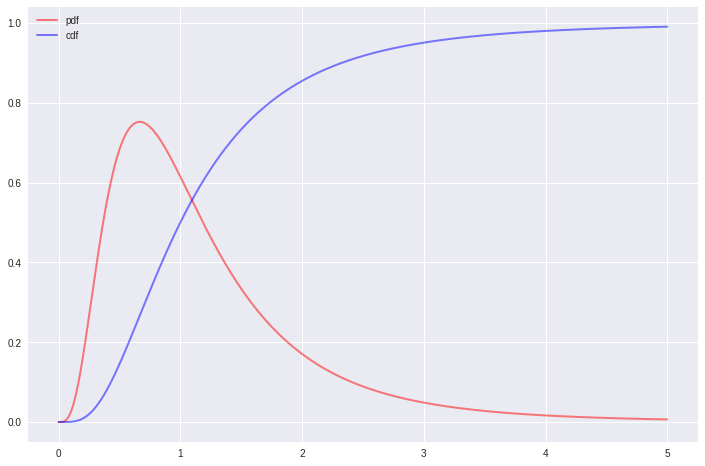

In [91]:
x = np.linspace(0.001, 5, 5000)

plot_f(x, 10, 10, 0, 1, color='red', lw=2, ls='-', alpha=0.5, label='pdf')
plot_f(x, 10, 10, 0, 1, cdf=True, color='blue', lw=2, ls='-', alpha=0.5, label='cdf')
plt.legend();

**The beta distribution:**

In [92]:
import scipy.stats as ss

def plot_beta(x_range, a, b, mu=0, sigma=1, cdf=False, **kwargs):
    '''
    Plots the f distribution function for a given x range, a and b
    If mu and sigma are not provided, standard beta is plotted
    If cdf=True cumulative distribution is plotted
    Passes any keyword arguments to matplotlib plot function
    '''
    x = x_range
    if cdf:
        y = ss.beta.cdf(x, a, b, mu, sigma)
    else:
        y = ss.beta.pdf(x, a, b, mu, sigma)
    plt.plot(x, y, **kwargs)

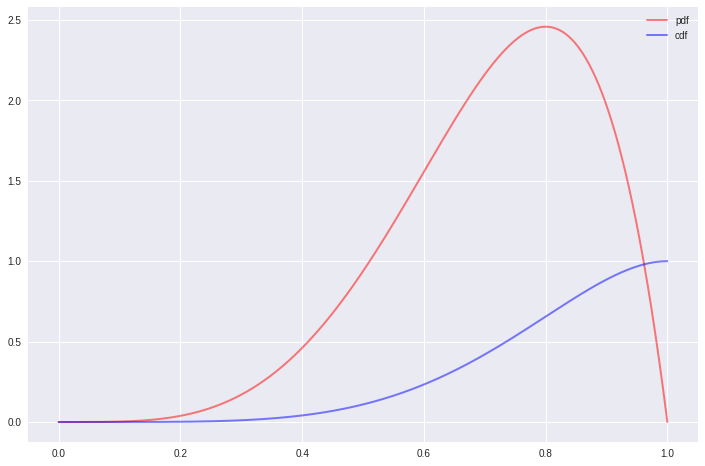

In [93]:
x = np.linspace(0, 1, 5000)

plot_beta(x, 5, 2, 0, 1, color='red', lw=2, ls='-', alpha=0.5, label='pdf')
plot_beta(x, 5, 2, 0, 1, cdf=True, color='blue', lw=2, ls='-', alpha=0.5, label='cdf')
plt.legend();

As you see, we can extend these as far as we like. These theoretical distributions are important to assess visually and get yourself familiarized with. It's a powerful tool in a data scientist's belt to determine the distribution of any variable just by looking at its histogram or KDE.

Let me know what you think, hit me up at [@emredjan](https://twitter.com/emredjan).